In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import det, inv

from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [3]:
data = pd.read_csv("../../data/Final_Energy_dataset.csv")
data['Date'] = pd.to_datetime(data['Date'])
cluster_data = data[((data['Date'].dt.day <= 3) & (data['Date'].dt.month > 6) & (data['Date'].dt.year == 2010)) 
            | ((data['Date'].dt.day <= 3) & (data['Date'].dt.month <= 6) & (data['Date'].dt.year == 2011))]
test_data = data[((data['Date'].dt.month > 6) & (data['Date'].dt.year == 2010)) 
            | ((data['Date'].dt.month <= 6) & (data['Date'].dt.year == 2011))]
cluster_load = cluster_data[["load_1","load_2","load_3","load_4","load_5","load_6","load_7","load_8","load_9","load_10",
                     "load_11","load_12","load_13","load_14","load_15","load_16","load_17","load_18","load_19","load_20",
                     "load_21","load_22","load_23","load_24","load_25","load_26","load_27","load_28","load_29","load_30"]]
cluster_pv = cluster_data[["pv_1","pv_2","pv_3","pv_4","pv_5","pv_6","pv_7","pv_8","pv_9","pv_10",
                     "pv_11","pv_12","pv_13","pv_14","pv_15","pv_16","pv_17","pv_18","pv_19","pv_20",
                     "pv_21","pv_22","pv_23","pv_24","pv_25","pv_26","pv_27","pv_28","pv_29","pv_30"]]
test_load = test_data[["load_1","load_2","load_3","load_4","load_5","load_6","load_7","load_8","load_9","load_10",
                     "load_11","load_12","load_13","load_14","load_15","load_16","load_17","load_18","load_19","load_20",
                     "load_21","load_22","load_23","load_24","load_25","load_26","load_27","load_28","load_29","load_30"]]
test_pv = test_data[["pv_1","pv_2","pv_3","pv_4","pv_5","pv_6","pv_7","pv_8","pv_9","pv_10",
                    "pv_11","pv_12","pv_13","pv_14","pv_15","pv_16","pv_17","pv_18","pv_19","pv_20",
                    "pv_21","pv_22","pv_23","pv_24","pv_25","pv_26","pv_27","pv_28","pv_29","pv_30"]]

cluster_data

,price,emissions,Date,load_1,load_2,load_3,load_4,load_5,load_6,load_7,...,pv_291,pv_292,pv_293,pv_294,pv_295,pv_296,pv_297,pv_298,pv_299,pv_300
0,0.21846,1.066200,2010-07-01 00:30:00,1.553,0.085,2.698,0.075,1.917,0.044,1.831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
1,0.21836,1.064706,2010-07-01 01:00:00,1.715,0.142,2.684,0.086,1.924,0.041,1.853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
2,0.22172,1.061807,2010-07-01 01:30:00,1.339,0.082,1.675,2.058,1.474,0.047,1.859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
3,0.22099,1.064542,2010-07-01 02:00:00,0.865,0.119,0.683,2.034,0.092,0.046,1.715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
4,0.21798,1.062929,2010-07-01 02:30:00,0.380,0.105,0.694,1.628,1.020,0.047,0.148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16218,0.21444,1.075461,2011-06-03 21:30:00,0.047,0.326,0.076,0.105,0.316,0.539,0.095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
16219,0.21413,1.086608,2011-06-03 22:00:00,0.099,0.422,0.075,0.105,0.386,0.999,0.080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0
16220,0.21586,1.093526,2011-06-03 22:30:00,0.064,0.350,0.070,0.094,0.486,0.421,0.132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
16221,0.21458,1.079257,2011-06-03 23:00:00,0.057,0.319,0.075,0.094,0.263,0.296,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


In [4]:
column_mapping = {f"load_{i}": f"pv_{i}" for i in range(1, 31)}

cluster_prosumption = pd.DataFrame()
for col1, col2 in column_mapping.items():
    cluster_prosumption[col1] = cluster_load[col1] - cluster_pv[col2]

test_prosumption = pd.DataFrame()
for col1, col2 in column_mapping.items():
    test_prosumption[col1] = test_load[col1] - test_pv[col2]

rename_mapping = {f"load_{i}": f"prosumption_{i}" for i in range(1, 31)}

cluster_prosumption.rename(columns=rename_mapping, inplace=True)
cluster_prosumption = cluster_prosumption.reset_index(drop=True).transpose()
test_prosumption.rename(columns=rename_mapping, inplace=True)
test_prosumption = test_prosumption.reset_index(drop=True).transpose()

In [53]:
cluster_prosumption


,0,1,2,3,4,5,6,7,8,9,...,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726
prosumption_1,1.553,1.715,1.339,0.865,0.380,1.329,0.191,0.098,0.104,1.238,...,0.063,0.076,0.096,0.051,0.100,0.047,0.099,0.064,0.057,0.079
prosumption_2,0.085,0.142,0.082,0.119,0.105,0.088,0.139,0.057,0.139,0.089,...,0.405,0.342,0.189,1.890,0.355,0.326,0.422,0.350,0.319,0.267
prosumption_3,2.698,2.684,1.675,0.683,0.694,0.705,0.774,1.791,0.694,0.710,...,0.069,0.071,0.072,0.077,0.072,0.076,0.075,0.070,0.075,0.094
prosumption_4,0.075,0.086,2.058,2.034,1.628,0.075,0.065,0.081,0.173,0.123,...,0.247,0.244,0.240,0.141,0.107,0.105,0.105,0.094,0.094,0.104
prosumption_5,1.917,1.924,1.474,0.092,1.020,0.141,0.083,0.882,0.088,0.098,...,0.382,0.270,0.285,0.273,0.332,0.316,0.386,0.486,0.263,0.190
prosumption_6,0.044,0.041,0.047,0.046,0.047,0.045,0.046,0.045,0.045,0.045,...,0.371,0.565,0.547,0.555,0.861,0.539,0.999,0.415,0.296,0.202
prosumption_7,1.831,1.853,1.859,1.715,0.148,0.065,0.134,0.078,0.073,0.114,...,0.061,0.138,0.151,0.122,0.119,0.095,0.080,0.132,0.168,0.102
prosumption_8,0.124,0.088,0.150,0.097,1.059,0.267,0.186,0.188,0.199,0.171,...,0.970,0.538,0.642,0.495,0.568,0.603,0.452,0.569,2.803,0.180
prosumption_9,0.033,0.019,0.286,0.397,0.009,0.009,0.602,0.073,0.008,0.009,...,0.131,1.348,1.379,1.391,1.200,0.109,0.122,0.061,0.019,1.877
prosumption_10,0.031,0.051,0.052,1.125,0.026,0.040,0.049,0.047,0.024,0.032,...,0.659,0.837,0.363,0.204,0.555,0.611,0.261,0.101,0.122,2.433


# Time domain features - Autocorrelations and partial autocorrelations

## Autocorrelation

Galeano and Pena (https://www.researchgate.net/publication/4765004_Multivariate_analysis_in_vector_time_series)

In [37]:
import statsmodels.api as sm

def acf_distance(x, y, R, weight_type='uniform', alpha=0.9):
    """
    Computes the distance between two time series based on their ACF.
    
    Parameters:
    - x, y: Time series data as numpy arrays.
    - R: The maximum lag for computing ACF.
    - weight_type: The type of weighting to use ('uniform', 'geometric', 'mahalanobis').
    - alpha: The decay parameter for geometric weights (only used when weight_type='geometric').
    
    Returns:
    - distance: The computed distance between the two time series.
    """
    # Estimate the ACF for both time series up to lag R
    acf_x = sm.tsa.acf(x, nlags=R, fft=False)[1:R+1]
    acf_y = sm.tsa.acf(y, nlags=R, fft=False)[1:R+1]
    
    # Compute the difference between the ACFs
    delta_acf = acf_x - acf_y
    
    # Define the weighting matrix Ω
    if weight_type == 'uniform':
        # Uniform weighting: Ω = I
        Omega = np.eye(R)
    elif weight_type == 'geometric':
        # Geometric decay: Ω = D with geometric weights on the diagonal
        geometric_weights = alpha ** np.arange(R)
        Omega = np.diag(geometric_weights)
    elif weight_type == 'mahalanobis':
        # Mahalanobis distance: Ω = M^(-1)
        bartlett_weights = np.array([1 - k/R for k in range(1, R+1)])
        Omega = np.diag(bartlett_weights)
    else:
        raise ValueError("Invalid weight_type. Choose 'uniform', 'geometric', or 'mahalanobis'.")
    
    # Compute the distance dACF(x, y)
    distance = np.sqrt(np.dot(np.dot(delta_acf, Omega), delta_acf.T))
    
    return distance



def create_distance_matrix(time_series_list, R, weight_type='uniform', alpha=0.9):
    """
    Creates a distance matrix for multiple time series using the specified ACF-based distance.
    
    Parameters:
    - time_series_list: List of time series, each as a numpy array.
    - R: The maximum lag for computing ACF.
    - weight_type: The type of weighting to use ('uniform', 'geometric', 'mahalanobis').
    - alpha: The decay parameter for geometric weights (only used when weight_type='geometric').
    
    Returns:
    - distance_matrix: A symmetric matrix where the entry (i, j) is the distance between time series i and j.
    """
    n = len(time_series_list)
    distance_matrix = np.zeros((n, n))
    
    # Compute the distance for each pair of time series
    for i in range(n):
        for j in range(i + 1, n):
            distance_matrix[i, j] = acf_distance(time_series_list[i], time_series_list[j], R, weight_type, alpha)
            distance_matrix[j, i] = distance_matrix[i, j]  # Symmetric matrix
    
    return distance_matrix

distance_matrix_uniform = create_distance_matrix(cluster_prosumption.values, 48, 'uniform')
distance_matrix_geometric = create_distance_matrix(cluster_prosumption.values, 48, 'geometric')
distance_matrix_mahalanobis = create_distance_matrix(cluster_prosumption.values, 48, 'mahalanobis')
u_agglo_labels = {}
g_agglo_labels = {}
m_agglo_labels = {}
u_agglo_silhouette_scores = {}
g_agglo_silhouette_scores = {}
m_agglo_silhouette_scores = {}
u_agglo_calinski_harabasz_scores = {}
g_agglo_calinski_harabasz_scores = {}
m_agglo_calinski_harabasz_scores = {}
for i in range(2,30):
    u_agglo_cluster = AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='complete')
    u_agglo_labels[i] = u_agglo_cluster.fit_predict(distance_matrix_uniform)
    u_agglo_silhouette_scores[i] = silhouette_score(distance_matrix_uniform, u_agglo_labels[i])
    u_agglo_calinski_harabasz_scores[i] = calinski_harabasz_score(distance_matrix_uniform, u_agglo_labels[i])
    g_agglo_cluster = AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='complete')
    g_agglo_labels[i] = g_agglo_cluster.fit_predict(distance_matrix_geometric)
    g_agglo_silhouette_scores[i] = silhouette_score(distance_matrix_geometric, g_agglo_labels[i])
    g_agglo_calinski_harabasz_scores[i] = calinski_harabasz_score(distance_matrix_geometric, g_agglo_labels[i])
    m_agglo_cluster = AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='complete')
    m_agglo_labels[i] = m_agglo_cluster.fit_predict(distance_matrix_mahalanobis)
    m_agglo_silhouette_scores[i] = silhouette_score(distance_matrix_mahalanobis, m_agglo_labels[i])
    m_agglo_calinski_harabasz_scores[i] = calinski_harabasz_score(distance_matrix_mahalanobis, m_agglo_labels[i])


u_dbscan_cluster = DBSCAN(metric='precomputed')
u_dbscan_labels = u_dbscan_cluster.fit_predict(distance_matrix_uniform)
g_dbscan_cluster = DBSCAN(metric='precomputed')
g_dbscan_labels = g_dbscan_cluster.fit_predict(distance_matrix_geometric)
m_dbscan_cluster = DBSCAN(metric='precomputed')
m_dbscan_labels = m_dbscan_cluster.fit_predict(distance_matrix_mahalanobis)

u_dbscan_silhouette_score = silhouette_score(distance_matrix_uniform, u_dbscan_labels)
g_dbscan_silhouette_score = silhouette_score(distance_matrix_geometric, g_dbscan_labels)
m_dbscan_silhouette_score = silhouette_score(distance_matrix_mahalanobis, m_dbscan_labels)
u_dbscan_calinski_harabasz_score = calinski_harabasz_score(distance_matrix_uniform, u_dbscan_labels)
g_dbscan_calinski_harabasz_score = calinski_harabasz_score(distance_matrix_geometric, g_dbscan_labels)
m_dbscan_calinski_harabasz_score = calinski_harabasz_score(distance_matrix_mahalanobis, m_dbscan_labels)

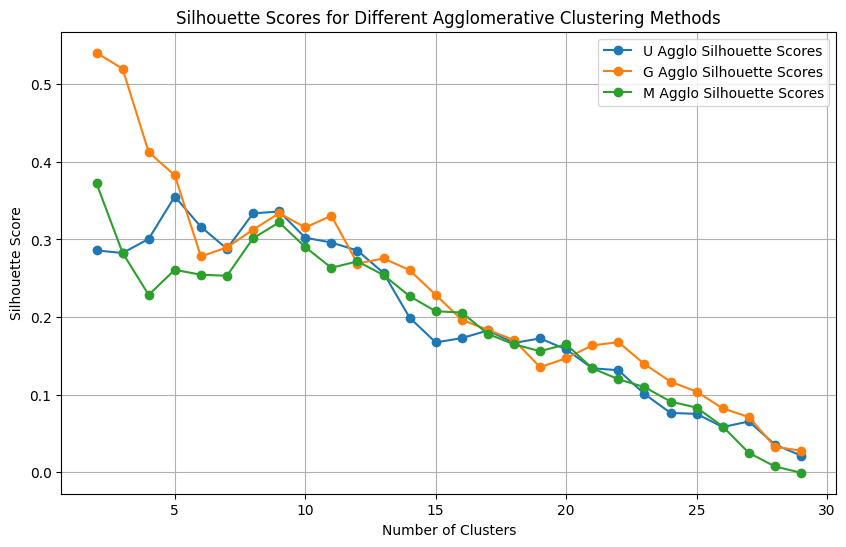

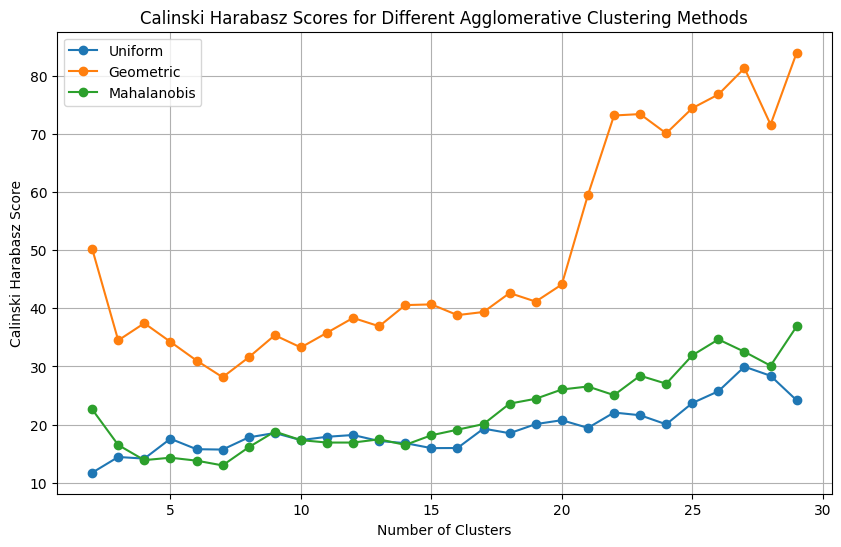

In [32]:
# Extract keys (number of clusters) and values (silhouette scores)
u_keys, u_values = zip(*sorted(u_agglo_silhouette_scores.items()))
g_keys, g_values = zip(*sorted(g_agglo_silhouette_scores.items()))
m_keys, m_values = zip(*sorted(m_agglo_silhouette_scores.items()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(u_keys, u_values, label='Uniform', marker='o')
plt.plot(g_keys, g_values, label='Geometric', marker='o')
plt.plot(m_keys, m_values, label='Mahalanobis', marker='o')

# Adding titles and labels
plt.title('Silhouette Scores for Different Agglomerative Clustering Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

u_keys, u_values = zip(*sorted(u_agglo_calinski_harabasz_scores.items()))
g_keys, g_values = zip(*sorted(g_agglo_calinski_harabasz_scores.items()))
m_keys, m_values = zip(*sorted(m_agglo_calinski_harabasz_scores.items()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(u_keys, u_values, label='Uniform', marker='o')
plt.plot(g_keys, g_values, label='Geometric', marker='o')
plt.plot(m_keys, m_values, label='Mahalanobis', marker='o')

# Adding titles and labels
plt.title('Calinski Harabasz Scores for Different Agglomerative Clustering Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.legend()
plt.grid(True)
plt.show()

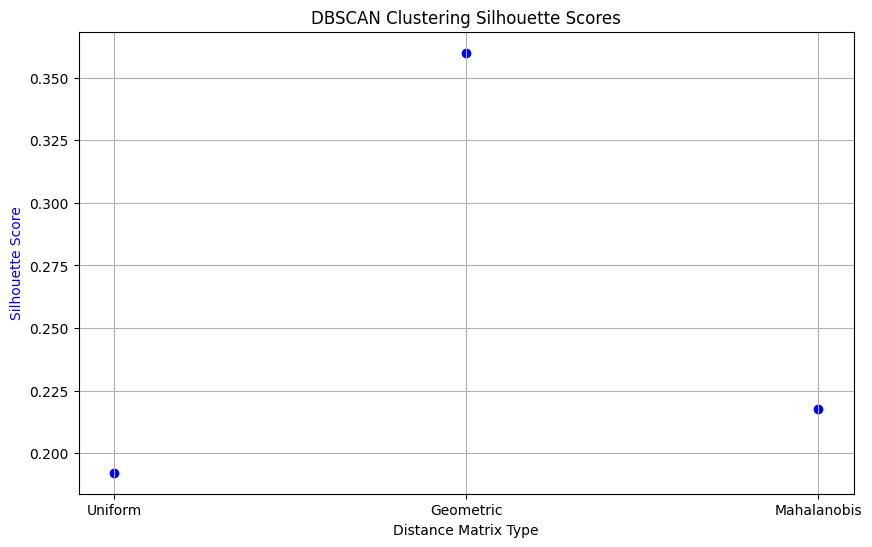

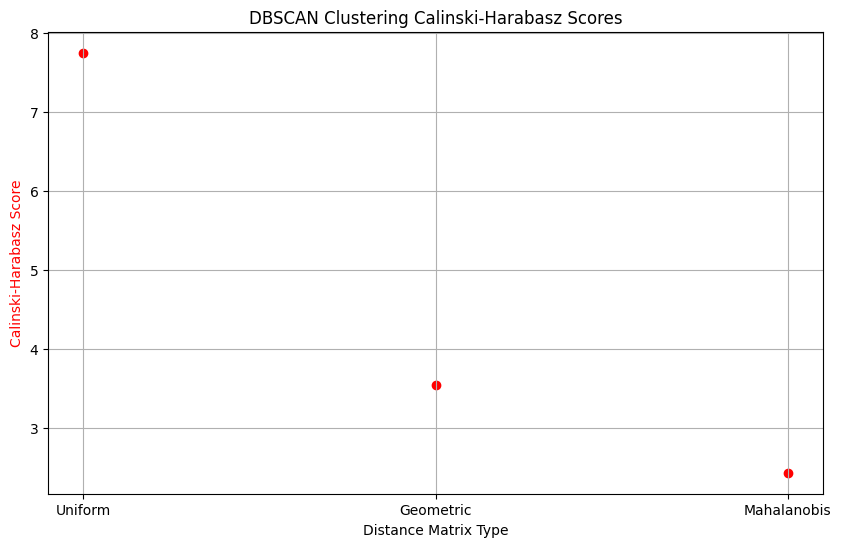

In [46]:
labels = ['Uniform', 'Geometric', 'Mahalanobis']
silhouette_scores = [u_dbscan_silhouette_score, g_dbscan_silhouette_score, m_dbscan_silhouette_score]
calinski_harabasz_scores = [u_dbscan_calinski_harabasz_score, g_dbscan_calinski_harabasz_score, m_dbscan_calinski_harabasz_score]

x = range(len(labels))

# Plotting Silhouette Scores
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.scatter(x, silhouette_scores, color='b')
ax1.set_xlabel('Distance Matrix Type')
ax1.set_ylabel('Silhouette Score', color='b')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_title('DBSCAN Clustering Silhouette Scores')
ax1.grid(True)

plt.show()

# Plotting Calinski-Harabasz Scores
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.scatter(x, calinski_harabasz_scores, color='r')
ax2.set_xlabel('Distance Matrix Type')
ax2.set_ylabel('Calinski-Harabasz Score', color='r')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_title('DBSCAN Clustering Calinski-Harabasz Scores')
ax2.grid(True)

plt.show()

In [ ]:

# labels_dict = {}
# for i in range(0,5):
#     labels_dict[f"{i}"] = [index for index, value in enumerate(labels) if value == i]

# print("Cluster labels:", labels_dict)
# for key in labels_dict.keys():
#     cluster = test_prosumption.loc[[f"prosumption_{i+1}" for i in labels_dict[key]]].transpose()
#     cluster['G'] = cluster.index.astype(int)%48
#     cluster = cluster.groupby('G').mean()
#     cluster.plot()
#     plt.show()

## Autocorrelation Kullback-Leibler information

In [42]:
# Function to compute the autocorrelation matrix for a time series at R lags
def autocorrelation_matrix(time_series, R):
    n = len(time_series)
    autocorr_matrix = np.zeros((R, R))
    
    for i in range(R):
        for j in range(R):
            # Compute the autocorrelation coefficient between lagged series
            lagged_series_1 = time_series[i:n-R+i]
            lagged_series_2 = time_series[j:n-R+j]
            autocorr_matrix[i, j] = np.corrcoef(lagged_series_1, lagged_series_2)[0, 1]
    
    return autocorr_matrix

def kullback_leibler_distance(Lx, Ly):
    term1 = np.trace(np.dot(Lx, inv(Ly)))
    term2 = np.log(det(Lx) / det(Ly))
    T = Lx.shape[0]  # R, the number of lags
    dKLD = term1 - term2 - T
    
    return dKLD

# Function to compute the distance matrix for a set of time series
def compute_distance_matrix(time_series_data, R):
    n_series = len(time_series_data)
    distance_matrix = np.zeros((n_series, n_series))
    
    for i in range(n_series):
        for j in range(i + 1, n_series):
            distance = symmetric_kld_distance(time_series_data[i], time_series_data[j], R)
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance  # The distance matrix is symmetric
    
    return distance_matrix

# Function to compute the symmetric KLD distance (dKLJ) between two time series
def symmetric_kld_distance(xt, yt, R):
    # Calculate autocorrelation matrices for xt and yt
    Lx = autocorrelation_matrix(xt, R)
    Ly = autocorrelation_matrix(yt, R)
    
    # Calculate dKLD(xt, yt) and dKLD(yt, xt)
    dKLD_xt_yt = kullback_leibler_distance(Lx, Ly)
    dKLD_yt_xt = kullback_leibler_distance(Ly, Lx)
    
    # Symmetric KLD distance
    dKLJ = 0.5 * (dKLD_xt_yt + dKLD_yt_xt)
    
    return dKLJ

distance_matrix = compute_distance_matrix(cluster_prosumption.values, 48)

kld_labels = {}
kld_silhouette_scores = {}
kld_calinski_harabasz_scores = {}
for i in range(2,30):
    kld_cluster = AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='complete')
    kld_labels[i] = u_agglo_cluster.fit_predict(distance_matrix_uniform)
    kld_silhouette_scores[i] = silhouette_score(distance_matrix_uniform, u_agglo_labels[i])
    kld_calinski_harabasz_scores[i] = calinski_harabasz_score(distance_matrix_uniform, u_agglo_labels[i])

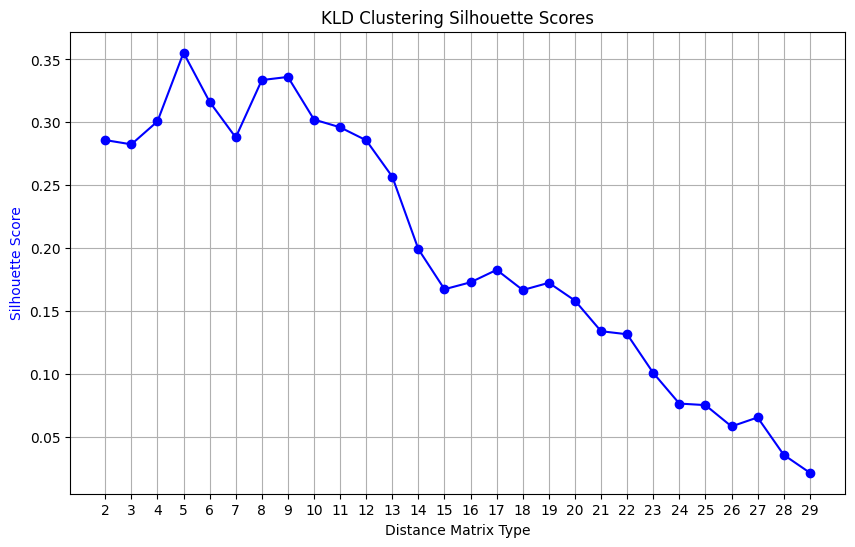

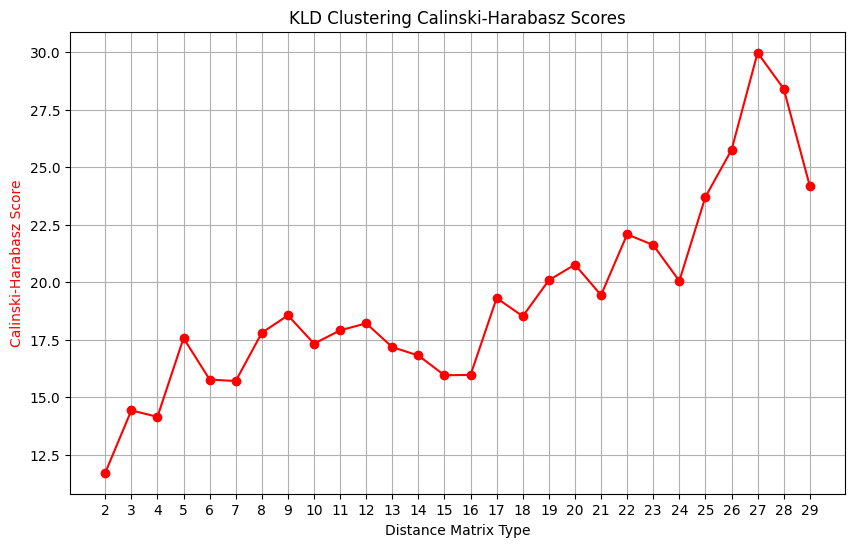

In [52]:
# Extract keys and values
labels = list(kld_silhouette_scores.keys())
silhouette_scores = list(kld_silhouette_scores.values())
calinski_harabasz_scores = list(kld_calinski_harabasz_scores.values())

x = range(len(labels))

# Plotting Silhouette Scores
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(x, silhouette_scores, color='b', marker='o')
ax1.set_xlabel('Distance Matrix Type')
ax1.set_ylabel('Silhouette Score', color='b')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_title('KLD Clustering Silhouette Scores')
ax1.grid(True)

plt.show()

# Plotting Calinski-Harabasz Scores
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(x, calinski_harabasz_scores, color='r', marker='o')
ax2.set_xlabel('Distance Matrix Type')
ax2.set_ylabel('Calinski-Harabasz Score', color='r')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_title('KLD Clustering Calinski-Harabasz Scores')
ax2.grid(True)

plt.show()

In [ ]:
# labels_dict = {}
# for i in range(0,5):
#     labels_dict[f"{i}"] = [index for index, value in enumerate(labels) if value == i]

# print("Cluster labels:", labels_dict)
# for key in labels_dict.keys():
#     cluster = test_prosumption.loc[[f"prosumption_{i+1}" for i in labels_dict[key]]].transpose()
#     cluster['G'] = cluster.index.astype(int)%48
#     cluster = cluster.groupby('G').mean()
#     cluster.plot()
#     plt.show()